<a href="https://colab.research.google.com/github/snanditachn/Nandita.S_cts/blob/main/Nandita_S_2211551_Case__study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study on Image augmentation

In machine learning (ML), the situation when the model does not generalize well from the training data to unseen data is called overfitting. As you might know, it is one of the trickiest obstacles in applied machine learning. 

The first step in tackling this problem is to actually know that your model is overfitting. That is where proper cross-validation comes in.

After identifying the problem you can prevent it from happening by applying regularization or training with more data. Still, sometimes you might not have additional data to add to your initial dataset. Acquiring and labeling additional data points may also be the wrong path. Of course, in many cases, it will deliver better results, but in terms of work, it is often time-consuming and expensive.
That is where Data Augmentation (DA) comes in.

**Data Augmentation** is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use DA if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model.

Let’s make this clear, Data Augmentation is not only used to prevent overfitting. In general, having a large dataset is crucial for the performance of both ML and Deep Learning (DL) models. However, we can improve the performance of the model by augmenting the data we already have. It means that Data Augmentation is also good for enhancing the model’s performance.

In general, DA is frequently used when building a DL model. That is why throughout this article we will mostly talk about performing Data Augmentation with various DL frameworks. Still, you should keep in mind that you can augment the data for the ML problems as well.

You can augment:

Audio

Text

Images

Any other types of data

###Data Augmentation techniques
We can apply various changes to the initial data. For example, for images we can use:

Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg

Color space transformations – change RGB color channels, intensify any color

Kernel filters – sharpen or blur an image 

Random Erasing – delete a part of the initial image

Mixing images – basically, mix images with one another. Might be counterintuitive but it works

# **Image augmentation**

Importing Packages

os package is used to read files and directory structure,

numpy is used to convert python list to numpy array and to perform required matrix operations and 

matplotlib.pyplot is used to plot the graph and display images in our training and validation data.

In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

 import Tensorflow and the Keras layers and models you will use to build your CNN. Also, import the ImageDataGenerator from Keras so that you can perform image augmentation.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In order to build our image classifier, we can begin by downloading the flowers dataset. We first need to download the archive version of the dataset and after the download we are storing it to "/tmp/" directory.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 8s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

Rose

Daisy

Dandelion

Sunflowers

Tulips

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

As there are no folders containing training and validation data. Therefore, we will have to create our own training and validation set. 

Create a train and a test folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation (test) set. 

Since we don't delete the original folders, they will still be in our flower_photos directory, but they will be empty. The code below also prints the total number of flower images we have for each type of flower.

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [ ]:
round(len(images)*0.8)

639

Setting up the path for the Training and Testing sets

In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

## Data Augmentation

Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use DA if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model.

Data Augmentation is not only used to prevent overfitting. In general, having a large dataset is crucial for the performance of both ML and Deep Learning (DL) models. However, we can improve the performance of the model by augmenting the data we already have. It means that Data Augmentation is also good for enhancing the model’s performance.

In general, DA is frequently used when building a DL model. That is why throughout this article we will mostly talk about performing Data Augmentation with various DL frameworks. Still, you should keep in mind that you can augment the data for the ML problems as well.

## Data Augmentation techniques
We can apply various changes to the initial data. For example, for images we can use:

Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg

Color space transformations – change RGB color channels, intensify any color

Kernel filters – sharpen or blur an image 

Random Erasing – delete a part of the initial image

Mixing images – basically, mix images with one another. Might be counterintuitive but it works

Moreover, the greatest advantage of the augmentation techniques is that you may use all of them at once. Thus, you may get plenty of unique samples of data from the initial one.

To augment images when using TensorFlow or Keras as our DL framework we can:

Write our own augmentation pipelines or layers using tf.image.

Use Keras preprocessing layers

Use ImageDataGenerator

## Experiment with Various Image Transformations

### Set Batch and Image Size
Create a batch_size of 100 images and set a value to IMG_SHAPE such that our training data consists of images with width of 150 pixels and height of 150 pixels.

In [ ]:
batch_size = 100
IMG_SHAPE = 150 

### Apply Random Horizontal Flip
Using ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Taking 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

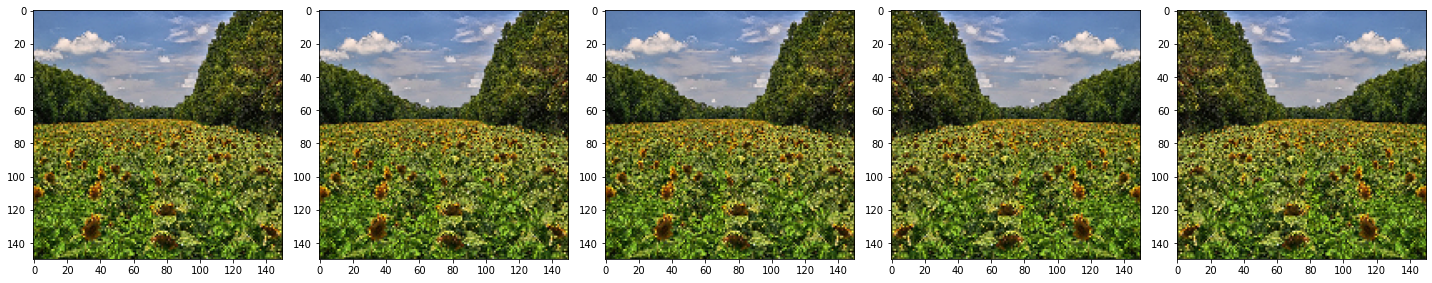

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Apply Random Rotation
Using ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Taking 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

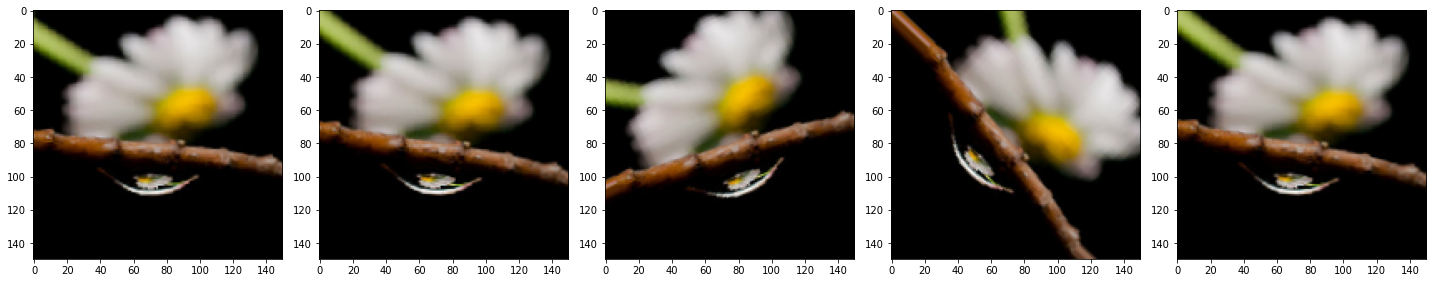

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Apply Random Zoom
Using ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Taking 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

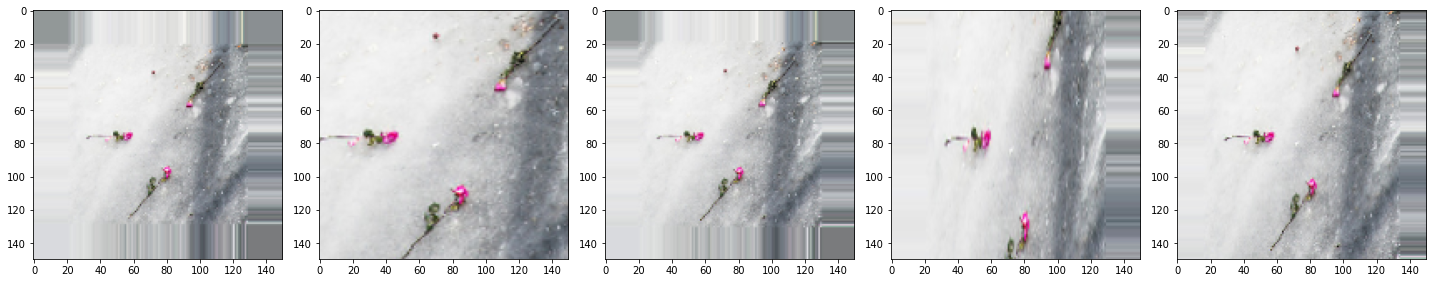

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Put It All Together
Using ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

random 45 degree rotation

random zoom of up to 50%

random horizontal flip

width shift of 0.15

height shift of 0.15

Using the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure to indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


Visualizing how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset.

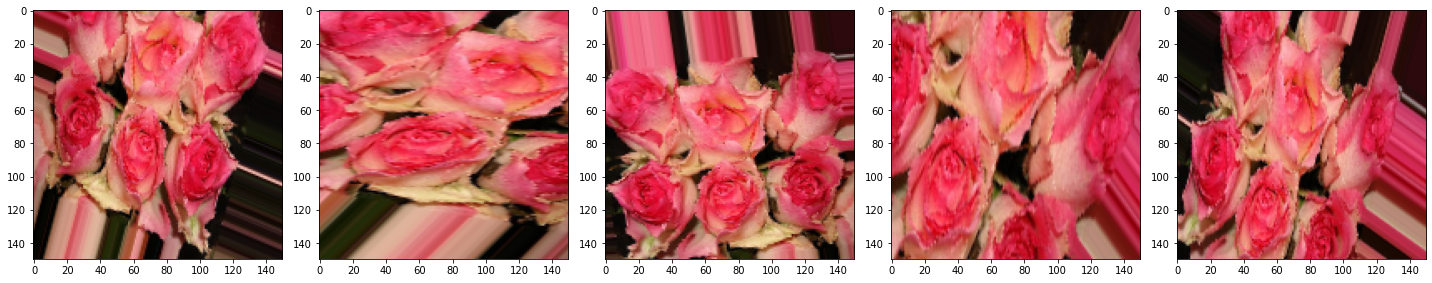

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Create a Data Generator for the Validation Set
Generally, we only apply data augmentation to our training examples. So, using ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the .flow_from_directory method to apply the above transformation to the images in our validation set. Make sure to indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. Note that it is not necessary to shuffle the images in the validation set.

In [ ]:
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


### Create the CNN
Creating a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the softmax activation function. All other layers should use a relu activation function. You should also add Dropout layers with a probability of 20%, where appropriate.

In [ ]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

### Compile the Model
Compiling the model using the ADAM optimizer, the sparse cross entropy function as a loss function. Look at training and validation accuracy on each epoch as we train our network, so make sure you also pass the metrics argument.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model
Training the model using the fit_generator function instead of the usual fit function. Using the fit_generator function because, using the ImageDataGenerator class to generate batches of training and validation data for our model. Train the model for n epochs (5 taken here to minimise time) and make sure to use the proper parameters in the fit_generator function.

In [ ]:
epochs = 5

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
30/30 [==============================] - 121s 4s/step - loss: 1.6434 - accuracy: 0.2647 - val_loss: 1.4255 - val_accuracy: 0.3946
Epoch 2/5
30/30 [==============================] - 98s 3s/step - loss: 1.2642 - accuracy: 0.4773 - val_loss: 1.1450 - val_accuracy: 0.5605
Epoch 3/5
30/30 [==============================] - 96s 3s/step - loss: 1.1291 - accuracy: 0.5458 - val_loss: 1.0516 - val_accuracy: 0.5633
Epoch 4/5
30/30 [==============================] - 99s 3s/step - loss: 1.0583 - accuracy: 0.5697 - val_loss: 1.0061 - val_accuracy: 0.5850
Epoch 5/5
30/30 [==============================] - 94s 3s/step - loss: 0.9765 - accuracy: 0.6204 - val_loss: 0.9265 - val_accuracy: 0.6286


### Plot Training and Validation Graphs.
Ploting the training and validation accuracy/loss graphs.

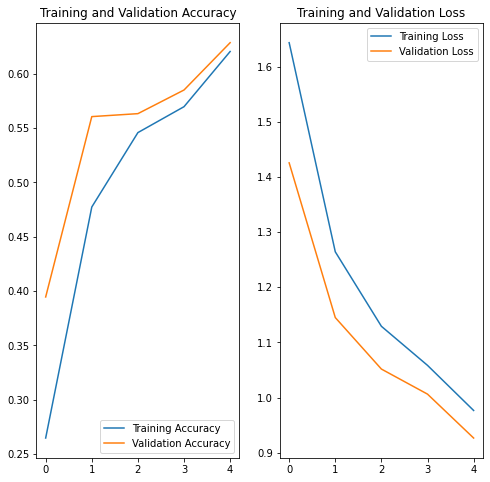

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()